## DT on Bank Marketing dataset

In [17]:
import pandas as pd
import numpy as np
%matplotlib inline
import sklearn.model_selection as cv
import sklearn
from sklearn import tree

In [18]:
## Load dataset
url_learn = "../../../data/learning/BankCleanLearn.csv"
url_test = "../../../data/test/BankCleanTest.csv"
data_learn = pd.read_csv(url_learn,sep=';')
data_learn.head()
data_test = pd.read_csv(url_test,sep=';')

In [19]:
## Separate data from labels
X_learn=data_learn.drop(['y'], axis=1)
y_learn=data_learn['y']

print(X_learn.shape)
X_learn.head()

X_test=data_test.drop(['y'], axis=1)
y_test=data_test['y']


(28832, 20)


In [20]:
## Transform to numerical dataset
#Xn=pd.get_dummies(X)
#Xn.head()
Xn_learn = pd.get_dummies(X_learn)
Xn_test = pd.get_dummies(X_test)
Xn_learn.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,prev_contacted_no,prev_contacted_yes
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,0,1,0,1,0
1,59,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,1,0,0,0,0,1,0,1,0
2,41,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,0,1,0,1,0
3,25,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,0,1,0,1,0
4,29,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,0,1,0,1,0


In [21]:
# First of all we are going to do a first try (but still with learning data!) with default parameters
# We are going to see the results training with a subset of the learning data and validating with another subset
# of the learning data (validation)
from sklearn.metrics import confusion_matrix
import statsmodels.stats.proportion
Xn_learn_train, Xn_learn_validate,  y_learn_train, y_learn_validate = cv.train_test_split(Xn_learn, y_learn, test_size=.3, random_state=1)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xn_learn_train, y_learn_train)
pred = clf.predict(Xn_learn_validate)

print(clf.score(Xn_learn_validate, y_learn_validate))
print(confusion_matrix(y_learn_validate, pred))
print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_learn_validate, pred))
print()
print(sklearn.metrics.classification_report(y_learn_validate, pred))
epsilon = sklearn.metrics.accuracy_score(y_learn_validate, pred)
proportion_confint(count=epsilon*Xn_learn_validate.shape[0], nobs=Xn_learn_validate.shape[0], alpha=0.05, method='binom_test')


0.838728323699422
[[6958  749]
 [ 646  297]]

Accuracy: 0.838728323699422

              precision    recall  f1-score   support

          no       0.92      0.90      0.91      7707
         yes       0.28      0.31      0.30       943

   micro avg       0.84      0.84      0.84      8650
   macro avg       0.60      0.61      0.60      8650
weighted avg       0.85      0.84      0.84      8650



(0.8308202041951558, 0.8463700341256397)

In [22]:
from statsmodels.stats.proportion import proportion_confint
from sklearn import tree
from sklearn.externals.six import StringIO  
import pydot
from IPython.display import Image
#import cmdline

#from imblearn.under_sampling import RandomUnderSampler,CondensedNearestNeighbour,InstanceHardnessThreshold
#from imblearn.over_sampling import RandomOverSampler

Xx, yy = Xn_learn, y_learn
#rus = RandomUnderSampler(random_state=42)
#rus = CondensedNearestNeighbour(random_state=42)
#rus = RandomOverSampler(random_state=42)
#Xx, yy = rus.fit_resample(Xx, yy)


from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score, make_scorer
f_scorer = make_scorer(f1_score, pos_label='yes')
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_split': list(np.linspace(0,1,21)),'min_samples_split':list(range(2,102,11))}
clf = GridSearchCV(tree.DecisionTreeClassifier(criterion='entropy',class_weight='balanced'), param_grid=params,cv=10,n_jobs=-1,scoring=f_scorer)  # If cv is integer, by default is Stratifyed 
clf.fit(Xn_learn, y_learn)
print("Best Params=",clf.best_params_, "F1 score=", clf.best_score_)

Best Params= {'min_impurity_split': 0.9, 'min_samples_split': 13} F1 score= 0.11816468378560543


/home/jordiae/.local/lib/python3.5/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


/home/jordiae/.local/lib/python3.5/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/jordiae/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jordiae/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jordiae/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, war

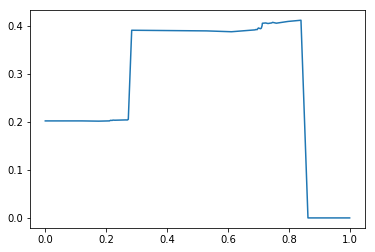

/home/jordiae/.local/lib/python3.5/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/jordiae/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


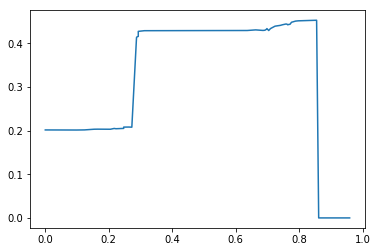

/home/jordiae/.local/lib/python3.5/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/jordiae/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jordiae/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


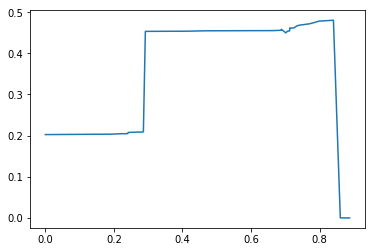

/home/jordiae/.local/lib/python3.5/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/jordiae/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jordiae/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jordiae/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, war

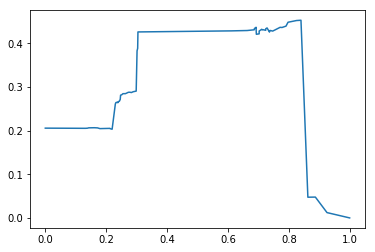

/home/jordiae/.local/lib/python3.5/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/jordiae/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jordiae/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jordiae/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, war

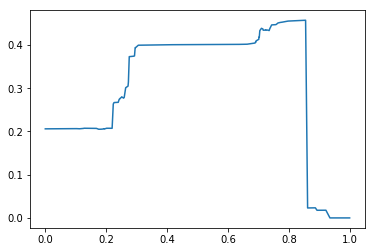

/home/jordiae/.local/lib/python3.5/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/jordiae/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jordiae/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jordiae/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, war

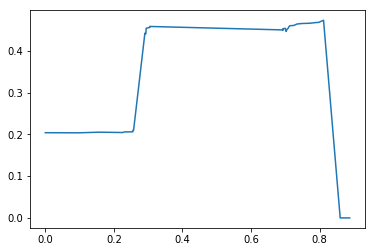

/home/jordiae/.local/lib/python3.5/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/jordiae/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jordiae/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jordiae/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, war

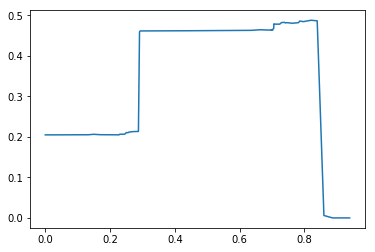

/home/jordiae/.local/lib/python3.5/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/jordiae/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jordiae/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jordiae/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, war

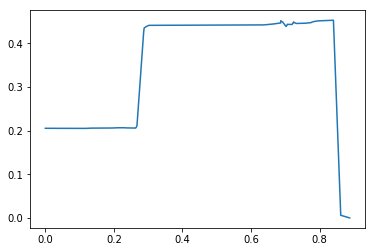

/home/jordiae/.local/lib/python3.5/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/jordiae/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


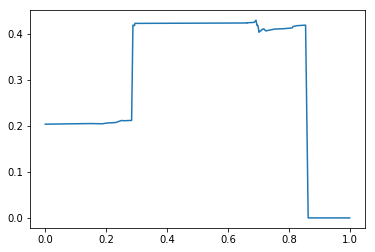

/home/jordiae/.local/lib/python3.5/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/home/jordiae/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jordiae/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jordiae/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, war

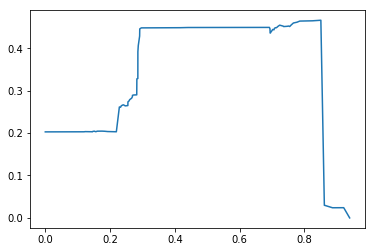

[array([0.84003721]), array([0.85523791, 0.85523791]), array([0.84003721, 0.84003721, 0.84003721]), array([0.84003721]), array([0.85524328]), array([0.81120786, 0.81120786, 0.81120786, 0.81120786, 0.81120786,
       0.81120786, 0.81120786]), array([0.82127608, 0.82127608, 0.82127608, 0.82127608, 0.82127608]), array([0.84004305, 0.84004305]), array([0.69230307, 0.69230307, 0.69230307, 0.69230307, 0.69230307,
       0.69230307, 0.69230307, 0.69230307, 0.69230307, 0.69230307,
       0.69230307, 0.69230307]), array([0.8513486, 0.8513486])]
Selected threshold in 10-fold cross validation: 0.7844766858267157

LEARN SET


/home/jordiae/.local/lib/python3.5/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


              precision    recall  f1-score   support

          no       0.93      0.92      0.93     25584
         yes       0.44      0.48      0.46      3248

   micro avg       0.87      0.87      0.87     28832
   macro avg       0.69      0.70      0.70     28832
weighted avg       0.88      0.87      0.88     28832



TEST SET
              precision    recall  f1-score   support

          no       0.93      0.92      0.93     10964
         yes       0.44      0.49      0.47      1392

   micro avg       0.87      0.87      0.87     12356
   macro avg       0.69      0.71      0.70     12356
weighted avg       0.88      0.87      0.88     12356



(0.8671174791939742, 0.8788938220640227)

In [25]:

from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score, make_scorer

def filterp(th,ProbClass1):
    """ Given a treshold "th" and a set of probabilies of belonging to class 1 "ProbClass1", return predictions """ 
    y=ProbClass1.shape[0]*['no']#np.zeros(ProbClass1.shape[0])
    for i,v in enumerate(ProbClass1):
        if ProbClass1[i]>th:
            y[i]='yes'
    return y  


clf = tree.DecisionTreeClassifier(criterion='entropy',class_weight='balanced',min_impurity_split= 0.9, min_samples_split= 13)
lth=[]

# We do a 10 fold crossvalidation with 10 iterations
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#Xx_array = Xx.values
#yy_array = yy.values
#yn_learn = pd.get_dummies(yy)
#yn_test = pd.get_dummies(yy)
for train_index, test_index in kf.split(Xx, yy):
    X_train2, X_test2 = Xx.iloc[train_index],Xx.iloc[test_index]
    y_train2, y_test2 = yy[train_index], yy[test_index]

    # Train with the training data of the iteration 
    clf.fit(X_train2, y_train2)
    # Obtaining probablity predictions for test data of the iterarion
    probs = clf.predict_proba(X_test2)
    # Collect probabilities of belonging to class 1
    ProbClass1 = probs[:,1]
    # Sort probabilities and generate pairs (threshold, f1-for-that-threshold) 
    res = np.array([[th,f1_score(y_test2,filterp(th,ProbClass1),pos_label='yes')] for th in np.sort(ProbClass1)])

    # Uncomment the following lines if you want to plot at each iteration how f1-score evolves increasing the threshold 
    plt.plot(res[:,0],res[:,1])
    plt.show()

    # Find the threshold that has maximum value of f1-score
    maxF = np.max(res[:,1])
    optimal_th = res[res[:,1]==maxF,0]
    
    # Store the optimal threshold found for the current iteration
    lth.append(optimal_th)

# Compute the average threshold for all 10 iterations
print(lth)

thdef = np.mean(np.concatenate(lth, axis=0 ))
print("Selected threshold in 10-fold cross validation:", thdef)
print()

from sklearn.metrics import classification_report
#thdef = 0.7844766858267157
# Train a classifier with the whole training data 
clf.fit(Xx, yy)

# Results with all the learning set
print("LEARN SET")
probs_learn = clf.predict_proba(Xx)
# Generate predictions using probabilities and threshold found on 10 folds cross-validation
pred_learn = filterp(thdef,probs_learn[:,1])
# Print results with this prediction vector
print(classification_report(yy, pred_learn))
epsilon_learn = sklearn.metrics.accuracy_score(yy, pred_learn)
proportion_confint(count=epsilon_learn*Xx.shape[0], nobs=Xx.shape[0], alpha=0.05, method='binom_test')


print()
print()
print("TEST SET")
# Obtain probabilities for data on test set
probs = clf.predict_proba(Xn_test)
# Generate predictions using probabilities and threshold found on 10 folds cross-validation
pred = filterp(thdef,probs[:,1])
# Print results with this prediction vector
print(classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)
proportion_confint(count=epsilon*Xn_test.shape[0], nobs=Xn_test.shape[0], alpha=0.05, method='binom_test')

# Ignore warnings explaining that in some iterations f1 score is 0


<bound method BaseSearchCV.score of GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_impurity_split': [0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.6000000000000001, 0.65, 0.7000000000000001, 0.75, 0.8, 0.8500000000000001, 0.9, 0.9500000000000001, 1.0], 'min_samples_split': [2, 13, 24, 35, 46, 57, 68, 79, 90, 101]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score, pos_label=yes), verbose=0)>

/opt/miniconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


0.8248624150210424
[[10099   865]
 [  703   689]]

Accuracy: 0.8730980899967627

             precision    recall  f1-score   support

         no       0.93      0.92      0.93     10964
        yes       0.44      0.49      0.47      1392

avg / total       0.88      0.87      0.88     12356



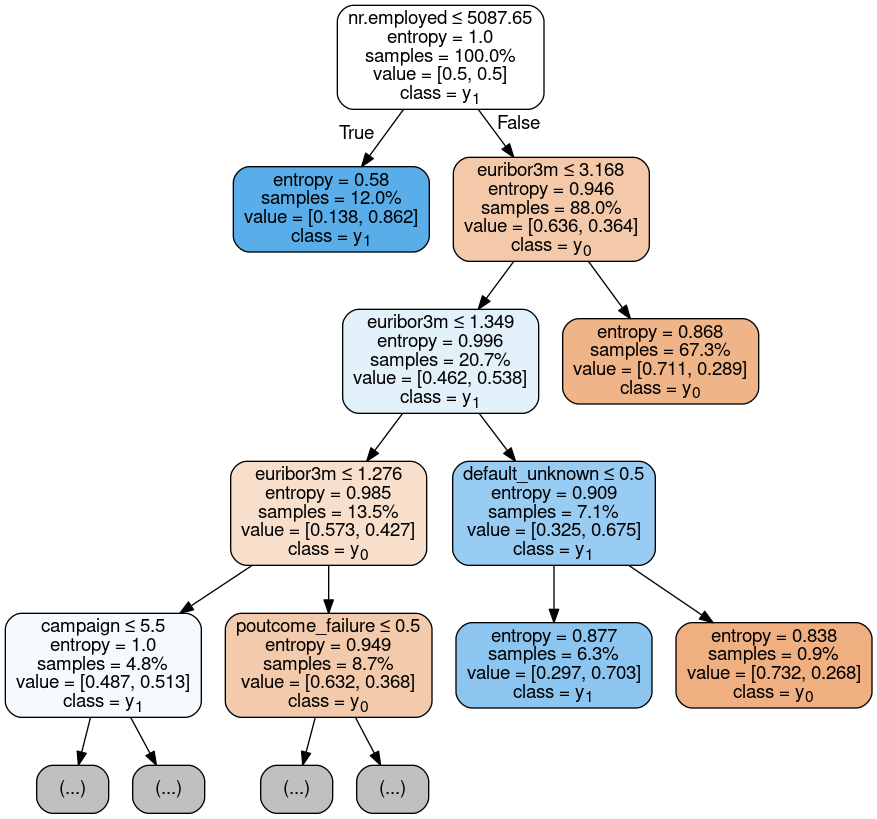

In [58]:
from sklearn import tree
from sklearn.externals.six import StringIO
import pydot
from IPython.display import Image
clf=tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=13,min_impurity_split=0.9,class_weight='balanced')
clf = clf.fit(Xn_learn, y_learn)
pred = clf.predict(Xn_test)
thdef = 0.7844766858267157
probs = clf.predict_proba(Xn_test)
# Generate predictions using probabilities and threshold found on 10 folds cross-validation
pred = filterp(thdef,probs[:,1])
dot_data = StringIO() 
tree.export_graphviz(clf, impurity= True, proportion= True, class_names= True, max_depth= 4, out_file=dot_data,    
                         filled=True, rounded=True,
                         feature_names=list(Xn_learn.columns.values),  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  